[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


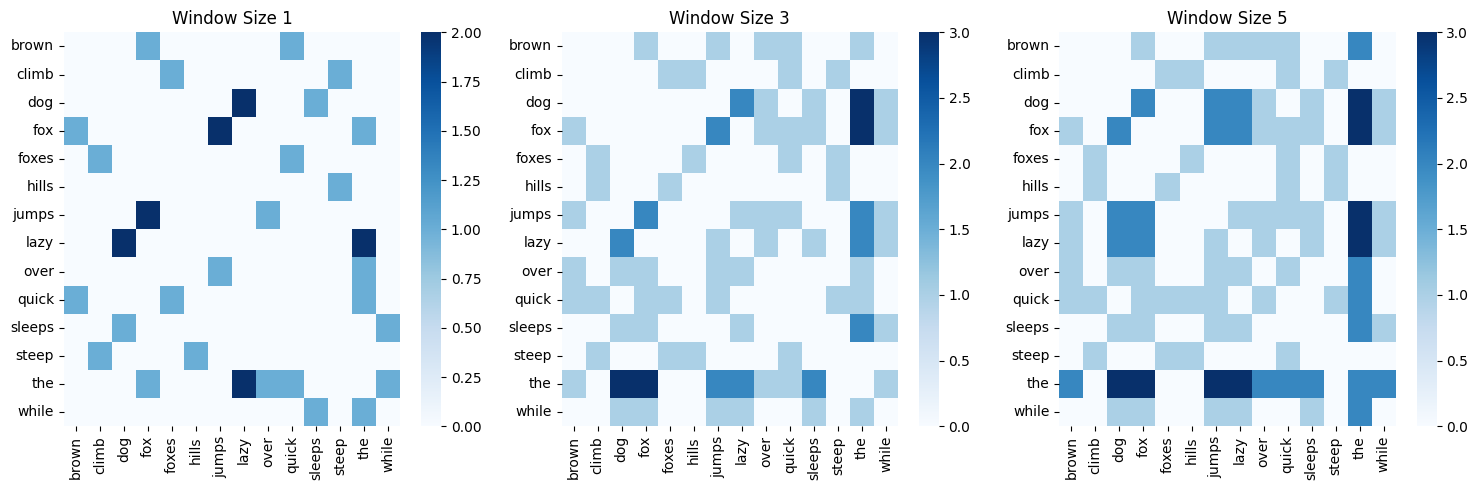


연습 1 분석:
- 창 크기 1: 인접 단어("quick"과 "brown")에 집중, 세부 관계 강조.
- 창 크기 3: 더 넓은 맥락 캡처, "the"와 "lazy" 같은 빈번한 단어 관계 강화.
- 창 크기 5: 더 많은 동시출현, 희소성 감소, "fox"와 "jumps" 관계 증가.
창 크기 3은 지역 및 전역 관계의 균형을 제공하여 일반적인 NLP 작업에 적합.



In [3]:
# 의존성 설치
!pip install nltk seaborn

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
import nltk

# NLTK 데이터 다운로드
nltk.download('punkt')
nltk.download('punkt_tab')

# 말뭉치 정의
corpus = [
    "the quick brown fox jumps over the lazy dog",
    "the lazy dog sleeps while the fox jumps",
    "quick foxes climb steep hills"
]

# 토큰화
tokenized_corpus = [word_tokenize(s.lower()) for s in corpus]
vocab = sorted(set(word for s in tokenized_corpus for word in s))
word2idx = {word: idx for idx, word in enumerate(vocab)}

# 동시출현 행렬 생성 함수
def build_cooc_matrix(tokenized_corpus, vocab, window_size):
    cooc_matrix = np.zeros((len(vocab), len(vocab)))
    for sentence in tokenized_corpus:
        for i, word in enumerate(sentence):
            start = max(0, i - window_size)
            end = min(len(sentence), i + window_size + 1)
            for j in range(start, end):
                if i != j:
                    cooc_matrix[word2idx[word]][word2idx[sentence[j]]] += 1
    return cooc_matrix

# 행렬 생성
matrices = {}
for ws in [1, 3, 5]:
    matrices[ws] = build_cooc_matrix(tokenized_corpus, vocab, ws)

# 히트맵 시각화
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, ws in enumerate([1, 3, 5]):
    sns.heatmap(matrices[ws], ax=axes[i], xticklabels=vocab, yticklabels=vocab, cmap='Blues')
    axes[i].set_title(f'Window Size {ws}')
plt.tight_layout()
plt.savefig('window_size_comparison.png')
plt.show()

# 분석 출력
print("""
연습 1 분석:
- 창 크기 1: 인접 단어("quick"과 "brown")에 집중, 세부 관계 강조.
- 창 크기 3: 더 넓은 맥락 캡처, "the"와 "lazy" 같은 빈번한 단어 관계 강화.
- 창 크기 5: 더 많은 동시출현, 희소성 감소, "fox"와 "jumps" 관계 증가.
창 크기 3은 지역 및 전역 관계의 균형을 제공하여 일반적인 NLP 작업에 적합.
""")